In [28]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

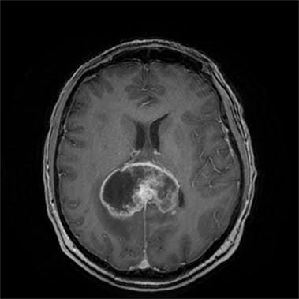

In [3]:
path = './data/testing/glioma_tumor'
name = 'image(32).jpg'

full_path = f'{path}/{name}'

# target sizes taken by tensorflow is -> 299x299, 224x224, 150x150

img = load_img(full_path, target_size=(299,299))
img

In [4]:
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [5]:
train_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

# batch size -> how many images at once
train_ds = train_gen.flow_from_directory('./data/training', target_size=(224,224), batch_size = 32)

Found 2870 images belonging to 4 classes.


In [6]:
train_ds.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [7]:
# to check whats inside or how it generates, we use generator, which returns X(features/images) and y(labels)
X, y = next(train_ds)
X

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [8]:
# it does one hot encoding, so first column is dress and the last is t-shirt
# this is also known as multiclass classification
y[:5]

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [9]:
test_ds = ImageDataGenerator(preprocessing_function= preprocess_input)
test_ds = test_ds.flow_from_directory('./data/testing', target_size=(224,224), batch_size = 32)

Found 394 images belonging to 4 classes.


In [10]:
base_model = EfficientNetB2(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    )

In [11]:
base_model.trainable = False
# this means that when we train our model, we do not want to change the Convolutional layers

In [12]:
inputs = keras.Input(shape=(224,224,3))

base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

# 4 because we have 4 classes
outputs = keras.layers.Dense(4)(vectors)

model = keras.Model(inputs, outputs)

In [13]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

In [14]:
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [15]:
model.compile(optimizer = optimizer, loss= loss, metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])

In [44]:
'''
epoc -> how many times over we need to go over our dataset
'''
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 99s 988ms/step - accuracy: 0.7652 - loss: 0.5893 - recall: 0.9289 - val_accuracy: 0.6421 - val_loss: 1.2619 - val_recall: 0.8046
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 891ms/step - accuracy: 0.8707 - loss: 0.3494 - recall: 0.9746 - val_accuracy: 0.6777 - val_loss: 1.2128 - val_recall: 0.8020
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 906ms/step - accuracy: 0.8847 - loss: 0.2949 - recall: 0.9847 - val_accuracy: 0.6624 - val_loss: 1.2060 - val_recall: 0.8426
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 899ms/step - accuracy: 0.8990 - loss: 0.2622 - recall: 0.9840 - val_accuracy: 0.6701 - val_loss: 1.2587 - val_recall: 0.8503
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 887ms/step - accuracy: 0.9108 - loss: 0.2234 - recall: 0.9885 - val_accuracy: 0.7538 - val_loss: 1.0617 - val_recall: 0.8680
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 893ms/step - accuracy: 0.9136 - loss: 0.2241 - recall: 0.9875 - val_accuracy: 0.7234 - val_loss: 1.3329 - val_recall: 0.850

In [16]:
# 1. Setup the Generator with Augmentations
# We use the specific 'preprocess_input' for EfficientNet to be safe
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Keeps data in 0-255 range as EfficientNet expects
    rotation_range=40,        # Rotate images to simulate different head positions
    width_shift_range=0.2,    # Shift image horizontally
    height_shift_range=0.2,   # Shift image vertically
    shear_range=0.2,          # Distort image angle
    zoom_range=0.2,           # Zoom in (simulate different scan proximities)
    vertical_flip=True,       # Flips upside down (Valid for Tumors, bad for Fashion)
    fill_mode='nearest',      # How to fill missing pixels after rotation
    validation_split=0.2      # Use 20% of data for validation
)

# 2. Setup the Path to your Dataset
DATA_DIR = 'data/training' 

# 3. Create the Train Generator
train_ds = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),   # EfficientNetB0 standard size
    batch_size=32,
    class_mode='categorical', # Use 'categorical' for >2 classes, 'binary' for 2
    subset='training',        # This is the 80% split
    shuffle=True              # Always shuffle training data
)

# 4. Create the Validation Generator
# Note: We usually do NOT apply heavy augmentations to validation data, 
# but we must use the same split logic.
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

validation_ds = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',      # This is the 20% split
    shuffle=False             # No need to shuffle validation usually
)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [17]:
def make_model(input_size=224, learning_rate=0.01, size_inner=100, droprate=0.2):
    base_model = EfficientNetB2(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False

    inputs = keras.Input(shape=(224,224,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    # 4 because we have 4 classes
    outputs = keras.layers.Dense(4)(drop)
    model = keras.Model(inputs, outputs)


    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer = optimizer, loss= loss, metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])

    return model
    

### testing with different parameters

In [54]:
%%time
# trying with different learning rates
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=validation_ds)
    scores[lr] = history.history
    print()
    print()

0.0001
Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.3274 - loss: 1.3802 - recall: 0.0000e+00 - val_accuracy: 0.2810 - val_loss: 1.3729 - val_recall: 0.0000e+00
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.4885 - loss: 1.3607 - recall: 0.0000e+00 - val_accuracy: 0.4241 - val_loss: 1.3578 - val_recall: 0.0000e+00
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5525 - loss: 1.3434 - recall: 0.0000e+00 - val_accuracy: 0.4503 - val_loss: 1.3439 - val_recall: 0.0000e+00
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5590 - loss: 1.3248 - recall: 0.0000e+00 - val_accuracy: 0.4799 - val_loss: 1.3272 - val_recall: 0.0000e+00
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5568 - loss: 1.3006 - recall: 0.0000e+00 - val_accuracy: 0.5183 - val_loss: 1.3043 - val_recall: 0.0000e+00
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5716 - loss: 1.2805 - recall: 0.0000e+00 - val_accuracy: 0.5358 - val

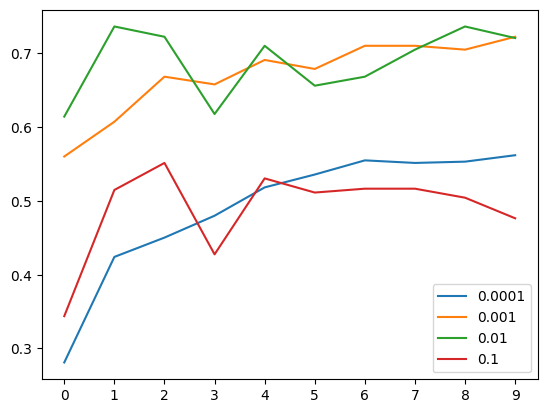

In [55]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

In [58]:
%%time

# lets take 0.01 - the best
# lets try with layers

# trying with different learning rates
scores = {}

for size in [10,100,1000]:
    print(size)
    model = make_model(size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=validation_ds)
    scores[size] = history.history
    print()
    print()

10
Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.5760 - loss: 1.0760 - recall: 0.2660 - val_accuracy: 0.5497 - val_loss: 1.0514 - val_recall: 0.3892
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6639 - loss: 0.8333 - recall: 0.6165 - val_accuracy: 0.6283 - val_loss: 0.9531 - val_recall: 0.5829
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6926 - loss: 0.7731 - recall: 0.6430 - val_accuracy: 0.6126 - val_loss: 0.8948 - val_recall: 0.6370
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6913 - loss: 0.7573 - recall: 0.6513 - val_accuracy: 0.6736 - val_loss: 0.8692 - val_recall: 0.6510
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6857 - loss: 0.7417 - recall: 0.6543 - val_accuracy: 0.6632 - val_loss: 0.8163 - val_recall: 0.6859
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7096 - loss: 0.7160 - recall: 0.7092 - val_accuracy: 0.6736 - val_loss: 0.8241 - val_recall: 0.6789
Epoch 7/10
72

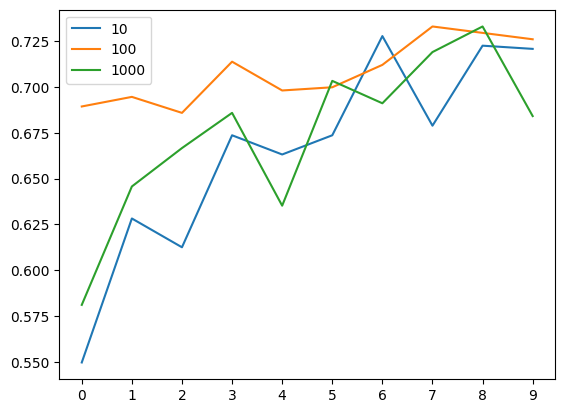

In [60]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=size)
plt.xticks(np.arange(10))
plt.legend()

In [62]:
%%time

# lets take lr 0.01, size 100 - the best
# lets try with layers

# trying with different learning rates
scores = {}

for dr in [0.3,0.4,0.5,0.7]:
    print(dr)
    model = make_model(droprate=dr)
    history = model.fit(train_ds, epochs=10, validation_data=validation_ds)
    scores[dr] = history.history
    print()
    print()

0.3
Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.5529 - loss: 1.1329 - recall: 0.2860 - val_accuracy: 0.6911 - val_loss: 0.9802 - val_recall: 0.5323
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6391 - loss: 0.8898 - recall: 0.5516 - val_accuracy: 0.7277 - val_loss: 0.8155 - val_recall: 0.7173
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6443 - loss: 0.8489 - recall: 0.5712 - val_accuracy: 0.6353 - val_loss: 0.9167 - val_recall: 0.6318
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6652 - loss: 0.7955 - recall: 0.5895 - val_accuracy: 0.6824 - val_loss: 0.8397 - val_recall: 0.6841
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6495 - loss: 0.7950 - recall: 0.5990 - val_accuracy: 0.7400 - val_loss: 0.7463 - val_recall: 0.7609
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6600 - loss: 0.8012 - recall: 0.6030 - val_accuracy: 0.6754 - val_loss: 0.8564 - val_recall: 0.6771
Epoch 7/10
7

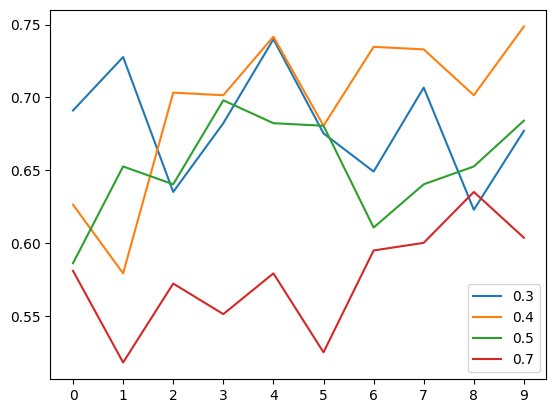

In [63]:
for dr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=dr)
plt.xticks(np.arange(10))
plt.legend()

In [64]:
# 0.2 is the best droprate

## now lets train the model with the best parameters

Now we first train using the trainable as false.

After that we unfreeze the top layers to train the CNN more accurately

In [18]:
model = make_model()

In [19]:
history_frozen = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6761 - loss: 0.8668 - recall: 0.8298 - val_accuracy: 0.6789 - val_loss: 0.7636 - val_recall: 0.9005
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7797 - loss: 0.5772 - recall: 0.9195 - val_accuracy: 0.6422 - val_loss: 0.9778 - val_recall: 0.8569
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8050 - loss: 0.5002 - recall: 0.9360 - val_accuracy: 0.7487 - val_loss: 0.7722 - val_recall: 0.8621
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8037 - loss: 0.5056 - recall: 0.9195 - val_accuracy: 0.7016 - val_loss: 0.7802 - val_recall: 0.9372
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8093 - loss: 0.4574 - recall: 0.9512 - val_accuracy: 0.7435 - val_loss: 0.6652 - val_recall: 0.9337
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8137 - loss: 0.4631 - recall: 0.9295 - val_accuracy: 0.6562 - val_loss: 0.8056 - val_recall: 0.9180
Epoch 7/10
72/72

In [20]:
def unfreeze_and_compile(model, learning_rate=1e-5):
    # 1e-5 -> 0.00001
    # Access the base model (EfficientNetB2)
    # (Index 0 is Input, Index 1 is EfficientNet)
    base_model = model.layers[1]

    # First, UNLOCK everything (Master Switch)
    base_model.trainable = True
    
    # Then, RE-LOCK the bottom layers (e.g., the first 90% of the model)
    # We slice [:-50], meaning "All layers EXCEPT the last 50"
    # Freezing the bottom layers keeps the basic shapes/edges stable
    # EfficientNetB2 has roughly 330+ layers. Let's unfreeze the last 50.
    for layer in base_model.layers[:-50]:
        layer.trainable = False

    # RE-COMPILE
    # Recompile for the trainable attribute changes to take effect.
    # Use a VERY LOW learning rate (1e-5) to avoid destroying what you just learned.
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
    
    return model

In [32]:
model = unfreeze_and_compile(model)

In [33]:
# Define the folder name
folder_name = 'efficentnetmodels'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Watch the Validation Loss
    patience=5,               # Wait 5 epochs before stopping
    restore_best_weights=True # CRITICAL: Go back to the best epoch, not the last one
)

checkpoint = keras.callbacks.ModelCheckpoint(
    os.path.join(folder_name, 'efficientnet_best_recall_{epoch:02d}_{val_recall:.3f}.keras'),
    save_best_only=True,
    monitor='val_recall', 
    mode='max'
)

In [34]:
%%time
# Train again (Fine-tuning)
# This will start from where the prev step left off
history_finetune = model.fit(
    train_ds, 
    epochs=50, # Add more epochs
    validation_data=validation_ds,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.8585 - loss: 0.3626 - recall: 0.9525 - val_accuracy: 0.7679 - val_loss: 0.6657 - val_recall: 0.8970
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8751 - loss: 0.3292 - recall: 0.9586 - val_accuracy: 0.7714 - val_loss: 0.6358 - val_recall: 0.9092
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8698 - loss: 0.3401 - recall: 0.9517 - val_accuracy: 0.7818 - val_loss: 0.6146 - val_recall: 0.9145
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8677 - loss: 0.3362 - recall: 0.9621 - val_accuracy: 0.7714 - val_loss: 0.6187 - val_recall: 0.9145
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8781 - loss: 0.3306 - recall: 0.9630 - val_accuracy: 0.7784 - val_loss: 0.6085 - val_recall: 0.9145
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8637 - loss: 0.3494 - recall: 0.9599 - val_accuracy: 0.7888 - val_loss: 0.5924 - val_recall: 0.9197
Epoch 7/50

## trying with xception model

In [65]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

In [66]:
# 1. Setup the Generator with Augmentations
# We use the specific 'preprocess_input' for EfficientNet to be safe
exception_train_datagen = ImageDataGenerator(
    preprocessing_function=xception_preprocess_input,  # Keeps data in 0-255 range as EfficientNet expects
    rotation_range=40,        # Rotate images to simulate different head positions
    width_shift_range=0.2,    # Shift image horizontally
    height_shift_range=0.2,   # Shift image vertically
    shear_range=0.2,          # Distort image angle
    zoom_range=0.2,           # Zoom in (simulate different scan proximities)
    horizontal_flip=True,     # Mirror image
    vertical_flip=True,       # Flips upside down (Valid for Tumors, bad for Fashion)
    fill_mode='nearest',      # How to fill missing pixels after rotation
    validation_split=0.2      # Use 20% of data for validation
)

# 2. Setup the Path to your Dataset
DATA_DIR = 'data/training' 

# 3. Create the Train Generator
exception_train_ds = exception_train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),   # EfficientNetB0 standard size
    batch_size=32,
    class_mode='categorical', # Use 'categorical' for >2 classes, 'binary' for 2
    subset='training',        # This is the 80% split
    shuffle=True              # Always shuffle training data
)

# 4. Create the Validation Generator
# Note: We usually do NOT apply heavy augmentations to validation data, 
# but we must use the same split logic.
exception_val_datagen = ImageDataGenerator(
    preprocessing_function=xception_preprocess_input,
    validation_split=0.2
)

exception_validation_ds = exception_val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',      # This is the 20% split
    shuffle=False             # No need to shuffle validation usually
)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [67]:
# Define the folder name
folder_name = 'XceptionModels'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Watch the Validation Loss
    patience=5,               # Wait 5 epochs before stopping
    restore_best_weights=True # CRITICAL: Go back to the best epoch, not the last one
)

In [68]:
checkpoint_xception = keras.callbacks.ModelCheckpoint(
    os.path.join(folder_name, 'xception_best_recall_{epoch:02d}_{val_recall:.3f}.keras'),
    save_best_only=True,
    monitor='val_recall', 
    mode='max'
)

In [69]:
## lets try with Xception model
def make_model_xception(input_size=224, learning_rate=0.01, size_inner=100, droprate=0.2):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )
    base_model.trainable = False

    inputs = keras.Input(shape=(224,224,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    # 4 because we have 4 classes
    outputs = keras.layers.Dense(4)(drop)
    model = keras.Model(inputs, outputs)


    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer = optimizer, loss= loss, metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])

    return model
    

In [70]:
%%time

model_xception = make_model_xception(
    input_size=224,
    learning_rate=0.001,
    size_inner=100,
    droprate=0.2
)

history = model_xception.fit(exception_train_ds, epochs=50, validation_data=exception_validation_ds, callbacks=[early_stopping, checkpoint_xception])

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.6561 - loss: 0.8504 - recall: 0.8363 - val_accuracy: 0.7103 - val_loss: 0.7525 - val_recall: 0.8674
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.7610 - loss: 0.6274 - recall: 0.9012 - val_accuracy: 0.7086 - val_loss: 0.6941 - val_recall: 0.8726
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.7967 - loss: 0.5531 - recall: 0.9495 - val_accuracy: 0.7400 - val_loss: 0.6476 - val_recall: 0.9337
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.8115 - loss: 0.4984 - recall: 0.9491 - val_accuracy: 0.7277 - val_loss: 0.6676 - val_recall: 0.9023
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.8058 - loss: 0.4983 - recall: 0.9534 - val_accuracy: 0.7260 - val_loss: 0.7034 - val_recall: 0.9145
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8193 - loss: 0.4693 - recall: 0.9761 - val_accuracy: 0.7504 - val_loss: 0.6373 - val_recall: 0.9616
Epoch 7/50

In [42]:
# lets move forward with efficientnet models. EfficientNet seems to be more accurate as well as the recall is better over the Xception model

## Loading the saved model

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.efficientnet import preprocess_input

In [77]:
saved_model = keras.models.load_model('efficentnetmodels/efficientnet_best_recall_34_0.951.keras')

In [78]:
test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_ds = test_gen.flow_from_directory(
    './data/Testing',
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 394 images belonging to 4 classes.


In [79]:
saved_model.evaluate(test_ds)
# returns -> [loss, accuracy]

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 728ms/step - accuracy: 0.7132 - loss: 1.1096 - recall: 0.8071


[1.1095556020736694, 0.7131979465484619, 0.807106614112854]

In [80]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

preds = saved_model.predict(test_ds)
y_pred = np.argmax(preds, axis=1)
y_true = test_ds.classes

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=test_ds.class_indices.keys()))


13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
[[ 29  56  12   3]
 [  5 107   3   0]
 [  1   4 100   0]
 [  5  12  12  45]]
                  precision    recall  f1-score   support

    glioma_tumor       0.72      0.29      0.41       100
meningioma_tumor       0.60      0.93      0.73       115
        no_tumor       0.79      0.95      0.86       105
 pituitary_tumor       0.94      0.61      0.74        74

        accuracy                           0.71       394
       macro avg       0.76      0.70      0.69       394
    weighted avg       0.74      0.71      0.69       394



In [81]:
classes = [
    'glioma_tumor',
    'meningioma_tumor',
    'no_tumor',
    'pituitary_tumor'
]


def predict(path):
    img = load_img(path, target_size = (224,224))

    x = np.array(img)
    X = np.array([x]) 
    
    X = preprocess_input(X)

    pred = model.predict(X)

    pred_list = dict(zip(classes,pred[0]))

    arr = np.array(list(pred_list.items()))
    arr[:,1] = arr[:,1].astype(float)
    sorted_arr = arr[arr[:,1].astype(float).argsort()[::-1]]
    
    return sorted_arr


In [83]:
path = "D:\Rohan\Machine Learning and AI\ML Zoomcamp\Course code\machine-learning-zoomcamp\Capstone_project\data\Testing\meningioma_tumor\image(15).jpg"
predict(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([['meningioma_tumor', '4.343569'],
       ['glioma_tumor', '0.010792263'],
       ['no_tumor', '-0.97965634'],
       ['pituitary_tumor', '-2.8189816']], dtype='<U32')